In [1]:
import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.width',1000)
pd.set_option('max_colwidth', 1000) 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Accent')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\ADMIN\Downloads\Sentiment.csv (1)\Sentiment.csv')
df.head(3)

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about the Climate Change question last night? Exactly. #GOPDebate,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdebate last night. Here are some of Scott's best lines in 90 seconds. #Walker16 http://t.co/ZSfF…,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the #GOPDebate was held in Cleveland? Wow.,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN


In [3]:
columns_to_drop = ['candidate_gold','relevant_yn_gold','sentiment_gold',
                   'subject_matter_gold','tweet_coord','tweet_location','user_timezone',
                   'id','tweet_created','tweet_id','name']
df.drop(labels=columns_to_drop, axis=1, inplace=True)
df.head()

,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,retweet_count,text
0,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,5,RT @NancyLeeGrahn: How did everyone feel about the Climate Change question last night? Exactly. #GOPDebate
1,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,26,RT @ScottWalker: Didn't catch the full #GOPdebate last night. Here are some of Scott's best lines in 90 seconds. #Walker16 http://t.co/ZSfF…
2,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,27,RT @TJMShow: No mention of Tamir Rice and the #GOPDebate was held in Cleveland? Wow.
3,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,138,RT @RobGeorge: That Carly Fiorina is trending -- hours after HER debate -- above any of the men in just-completed #GOPdebate says she's on …
4,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,156,RT @DanScavino: #GOPDebate w/ @realDonaldTrump delivered the highest ratings in the history of presidential debates. #Trump2016 http://t.co…


In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

candidate                    0
candidate_confidence         0
relevant_yn                  0
relevant_yn_confidence       0
sentiment                    0
sentiment_confidence         0
subject_matter               0
subject_matter_confidence    0
retweet_count                0
text                         0
dtype: int64

In [6]:
df['sentiment'].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

### Preprocessing Text Data

In [7]:
import nltk
from nltk.corpus import stopwords

stopword_set = set(stopwords.words('english'))

In [8]:
import re
def remove_stopwords(df, text, word_cleaned):
    word_filtered = [word.lower() for word in text]
    word_filtered = [word_filtered.apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))]
    word_cleaned = [word for word in word_filtered]
     #Stop words
    word_cleaned = word_cleaned.apply(lambda x : ' '.join([word for word in x.split() if word not in stopword_set]))
    return df

In [9]:
def  clean_text(df, text_field, new_text_field_name):
    # cleaning,lower_case
    df[new_text_field_name] = df[text_field].str.lower()
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    # remove numbers
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", " ", elem))
    #Stop words
    df[new_text_field_name] = df[new_text_field_name].apply(lambda x : ' '.join([word for word in x.split() if word not in stopword_set]))

    return df
data_clean = clean_text(df, 'text', 'Text_clean')
data_clean.head()


,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,retweet_count,text,Text_clean
0,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,5,RT @NancyLeeGrahn: How did everyone feel about the Climate Change question last night? Exactly. #GOPDebate,everyone feel climate change question last night exactly gopdebate
1,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,26,RT @ScottWalker: Didn't catch the full #GOPdebate last night. Here are some of Scott's best lines in 90 seconds. #Walker16 http://t.co/ZSfF…,didnt catch full gopdebate last night scotts best lines seconds walker
2,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,27,RT @TJMShow: No mention of Tamir Rice and the #GOPDebate was held in Cleveland? Wow.,mention tamir rice gopdebate held cleveland wow
3,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,138,RT @RobGeorge: That Carly Fiorina is trending -- hours after HER debate -- above any of the men in just-completed #GOPdebate says she's on …,carly fiorina trending hours debate men justcompleted gopdebate says shes
4,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,156,RT @DanScavino: #GOPDebate w/ @realDonaldTrump delivered the highest ratings in the history of presidential debates. #Trump2016 http://t.co…,gopdebate w delivered highest ratings history presidential debates trump


In [10]:
df['text'][0]

'RT @NancyLeeGrahn: How did everyone feel about the Climate Change question last night? Exactly. #GOPDebate'

In [11]:
df['Text_clean'][0]

'everyone feel climate change question last night exactly gopdebate'

In [12]:
df.head(3)

,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,retweet_count,text,Text_clean
0,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,5,RT @NancyLeeGrahn: How did everyone feel about the Climate Change question last night? Exactly. #GOPDebate,everyone feel climate change question last night exactly gopdebate
1,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,26,RT @ScottWalker: Didn't catch the full #GOPdebate last night. Here are some of Scott's best lines in 90 seconds. #Walker16 http://t.co/ZSfF…,didnt catch full gopdebate last night scotts best lines seconds walker
2,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,27,RT @TJMShow: No mention of Tamir Rice and the #GOPDebate was held in Cleveland? Wow.,mention tamir rice gopdebate held cleveland wow


In [13]:
import string
def remove_punctuation(mess):
    no_punctuation = [char for char in mess if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return [word for word in no_punctuation.split() if word.lower() 
            not in stopword_set]

In [14]:
df['Text_clean'] = df['Text_clean'].apply(remove_punctuation)

In [15]:
df['Text_clean'][0:4]

0            [everyone, feel, climate, change, question, last, night, exactly, gopdebate]
1      [didnt, catch, full, gopdebate, last, night, scotts, best, lines, seconds, walker]
2                                 [mention, tamir, rice, gopdebate, held, cleveland, wow]
3    [carly, fiorina, trending, hours, debate, men, justcompleted, gopdebate, says, shes]
Name: Text_clean, dtype: object

In [16]:
df.head(3)

,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,retweet_count,text,Text_clean
0,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,5,RT @NancyLeeGrahn: How did everyone feel about the Climate Change question last night? Exactly. #GOPDebate,"[everyone, feel, climate, change, question, last, night, exactly, gopdebate]"
1,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,26,RT @ScottWalker: Didn't catch the full #GOPdebate last night. Here are some of Scott's best lines in 90 seconds. #Walker16 http://t.co/ZSfF…,"[didnt, catch, full, gopdebate, last, night, scotts, best, lines, seconds, walker]"
2,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,27,RT @TJMShow: No mention of Tamir Rice and the #GOPDebate was held in Cleveland? Wow.,"[mention, tamir, rice, gopdebate, held, cleveland, wow]"


In [17]:
import contractions
def remove_short_words(text):
    expanded_words = []
    for word in text:
        expanded_words.append(contractions.fix(word))
    expanded_words = ' '.join(expanded_words) 
    return expanded_words

In [18]:
df['Text_clean'] = df['Text_clean'].apply(remove_short_words)

In [19]:
df['Text_clean'][0:4]

0             everyone feel climate change question last night exactly gopdebate
1       did not catch full gopdebate last night scotts best lines seconds walker
2                                mention tamir rice gopdebate held cleveland wow
3    carly fiorina trending hours debate men justcompleted gopdebate says she is
Name: Text_clean, dtype: object

In [20]:
df.head(3)

,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,retweet_count,text,Text_clean
0,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,5,RT @NancyLeeGrahn: How did everyone feel about the Climate Change question last night? Exactly. #GOPDebate,everyone feel climate change question last night exactly gopdebate
1,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,26,RT @ScottWalker: Didn't catch the full #GOPdebate last night. Here are some of Scott's best lines in 90 seconds. #Walker16 http://t.co/ZSfF…,did not catch full gopdebate last night scotts best lines seconds walker
2,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,27,RT @TJMShow: No mention of Tamir Rice and the #GOPDebate was held in Cleveland? Wow.,mention tamir rice gopdebate held cleveland wow


In [21]:
#this function will remove all the tokens which are not alphabatic
def remove_digits(doc):
    
    token = doc.split()
    result = ' '.join([i for i in token if i.isalpha()])
    return result

In [22]:
df['Text_clean'] = df['Text_clean'].apply(remove_digits)
df['Text_clean']

0                                 everyone feel climate change question last night exactly gopdebate
1                           did not catch full gopdebate last night scotts best lines seconds walker
2                                                    mention tamir rice gopdebate held cleveland wow
3                        carly fiorina trending hours debate men justcompleted gopdebate says she is
4                           gopdebate w delivered highest ratings history presidential debates trump
                                                    ...                                             
13866                               yarbrough love see men never faced pregnancy talk body gopdebate
13867             thought huckabee exceeded expectations gopdebate imwithhuck gop ccot teaparty tcot
13868                                      tedcruz president always tell truth said would gopdebates
13869    gopdebate donald trump says does not time political correctness calling women fat 

In [23]:
#text = "i amd34 asjhd67 fief 1998 V"
#token = text.split()
#for i in token:
#    if i.isalpha():
#        print(i)
        


In [24]:
df.head(3)

,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,retweet_count,text,Text_clean
0,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,5,RT @NancyLeeGrahn: How did everyone feel about the Climate Change question last night? Exactly. #GOPDebate,everyone feel climate change question last night exactly gopdebate
1,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,26,RT @ScottWalker: Didn't catch the full #GOPdebate last night. Here are some of Scott's best lines in 90 seconds. #Walker16 http://t.co/ZSfF…,did not catch full gopdebate last night scotts best lines seconds walker
2,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,27,RT @TJMShow: No mention of Tamir Rice and the #GOPDebate was held in Cleveland? Wow.,mention tamir rice gopdebate held cleveland wow


In [25]:
df['text'][566]

'@AmbitiousPaul "our skin does not make us who we are.. It\'s our brain"... How is that a sellout? #GOPDebate'

In [26]:
df['Text_clean'][566]

'skin make us brain sellout gopdebate'

In [27]:
#importing libs for stemming
import nltk
import re
from nltk.stem import SnowballStemmer
print(" ".join(SnowballStemmer.languages))

arabic danish dutch english finnish french german hungarian italian norwegian porter portuguese romanian russian spanish swedish


In [28]:
#we will select the dutch language stemmer as out text is in dutch language
stemmer = SnowballStemmer('english')
df['Text_clean'] = df['Text_clean'].apply(stemmer.stem)
df['Text_clean'][0:8]

0                  everyone feel climate change question last night exactly gopdeb
1           did not catch full gopdebate last night scotts best lines seconds walk
2                                  mention tamir rice gopdebate held cleveland wow
3       carly fiorina trending hours debate men justcompleted gopdebate says she i
4         gopdebate w delivered highest ratings history presidential debates trump
5    tx first day rescind every illegal executive action taken barack obama gopdeb
6                                 liked happy heard going moderator anymore gopdeb
7                                             going msnbc live around pm et gopdeb
Name: Text_clean, dtype: object

In [29]:
df.head(3)

,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,retweet_count,text,Text_clean
0,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,5,RT @NancyLeeGrahn: How did everyone feel about the Climate Change question last night? Exactly. #GOPDebate,everyone feel climate change question last night exactly gopdeb
1,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,26,RT @ScottWalker: Didn't catch the full #GOPdebate last night. Here are some of Scott's best lines in 90 seconds. #Walker16 http://t.co/ZSfF…,did not catch full gopdebate last night scotts best lines seconds walk
2,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,27,RT @TJMShow: No mention of Tamir Rice and the #GOPDebate was held in Cleveland? Wow.,mention tamir rice gopdebate held cleveland wow


In [30]:
df['text'][67]

"Trying to decide if it's too early to come back to Twitter fulltime. Was gonna wait closer to election but the #GOPDebate may have me hooked"

In [31]:
df['Text_clean'][67]

'trying decide early come back twitter fulltime going to wait closer election gopdebate may hook'

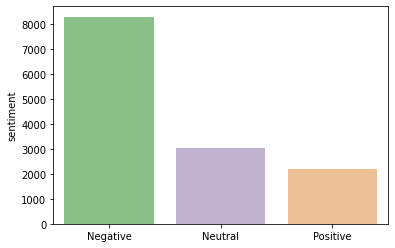

In [32]:
x = df['sentiment'].value_counts()
sns.barplot(x.index , x)
plt.show()

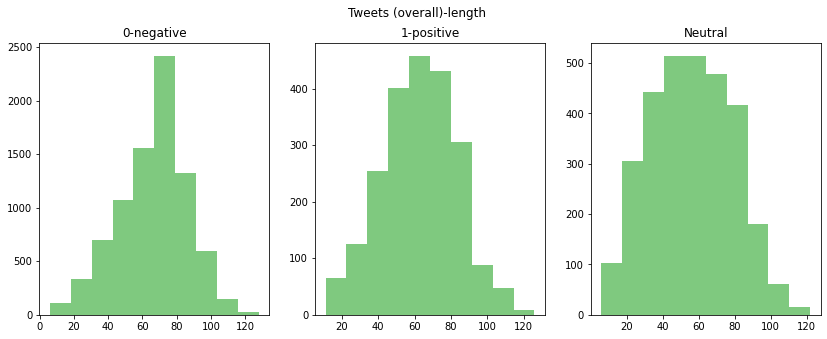

In [33]:
fig,(ax1,ax2, ax3)=plt.subplots(1,3,figsize=(14,5))
tweet_len = df[df['sentiment'] == 'Negative']['Text_clean'].apply(lambda x : len(x))
ax1.hist(tweet_len )
ax1.set_title('0-negative')

tweet_len = df[df['sentiment'] == 'Positive']['Text_clean'].apply(lambda x : len(x))
ax2.hist(tweet_len)
ax2.set_title('1-positive')

tweet_len = df[df['sentiment'] == 'Neutral']['Text_clean'].apply(lambda x : len(x))
ax3.hist(tweet_len)
ax3.set_title('Neutral')

fig.suptitle('Tweets (overall)-length')
plt.show()

In [34]:
from spellchecker import SpellChecker
## Spelling correction library ( pip install pyspellchecker)
spell = SpellChecker()
def correct_spelling(text):
    corrected_text = []
    missplled_words = spell.unknown(text.split())
    for word in text.split():
        if word in missplled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
            
    return ' '.join(corrected_text)  
example = "corect me please"
print(correct_spelling(example))


correct me please


In [35]:
# df['Text_clean'] = df['Text_clean'].apply(correct_spelling) It would take long time so below is to cut down and train it with 
#batch

In [36]:
df.shape

(13497, 11)

In [37]:
# Selecting tweets that are positive and negative
df_final = df[df['sentiment'] != 'Neutral']

In [38]:
# Converting positive and negative to 1 and 0
df_final['sentiment'] = df_final['sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)

In [39]:
df_final['sentiment'].value_counts()

0    8279
1    2184
Name: sentiment, dtype: int64

**Note:** 
- Whenever we have more records then the function will take long time to train on them and it would be time consuming, So what we do is taking a batch size of 50 and  iterate over total records and train 50 records at a time 

In [40]:

'''

from time import time  
## It would take much time , I'll be tracking the overall progress by taking 50 records at a time.
# if you have 13497 records then 13497/50 = 269 epochs are there 

i = 0
j = 50 # j is usually the batch size
t = time()
for k in range(len(df)):
        if i < 13497:
            print("We are at [{}:{}] loc and {}th iteration of total 270 epochs , time spent {} secs ... \
            ".format(i,j,k,np.round((time()-t))))
            df['Text_clean'][i:j] = df['Text_clean'][i:j].apply(correct_spelling)
            
        else:
            print("Last iteration !!!!!")
            df['Text_clean'][i:] = df['Text_clean'][i:].apply(correct_spelling)
            break
        i+=50
        j+=50
        
df.head()
'''

'\n\nfrom time import time  \n## It would take much time , I\'ll be tracking the overall progress by taking 50 records at a time.\n# if you have 13497 records then 13497/50 = 269 epochs are there \n\ni = 0\nj = 50 # j is usually the batch size\nt = time()\nfor k in range(len(df)):\n        if i < 13497:\n            print("We are at [{}:{}] loc and {}th iteration of total 270 epochs , time spent {} secs ...             ".format(i,j,k,np.round((time()-t))))\n            df[\'Text_clean\'][i:j] = df[\'Text_clean\'][i:j].apply(correct_spelling)\n            \n        else:\n            print("Last iteration !!!!!")\n            df[\'Text_clean\'][i:] = df[\'Text_clean\'][i:].apply(correct_spelling)\n            break\n        i+=50\n        j+=50\n        \ndf.head()\n'

In [41]:
df_final = df[df['sentiment']!= 'Neutral']

In [42]:
df_final

,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,retweet_count,text,Text_clean
1,Scott Walker,1.0000,yes,1.0000,Positive,0.6333,None of the above,1.0000,26,RT @ScottWalker: Didn't catch the full #GOPdebate last night. Here are some of Scott's best lines in 90 seconds. #Walker16 http://t.co/ZSfF…,did not catch full gopdebate last night scotts best lines seconds walk
3,No candidate mentioned,1.0000,yes,1.0000,Positive,1.0000,None of the above,0.7039,138,RT @RobGeorge: That Carly Fiorina is trending -- hours after HER debate -- above any of the men in just-completed #GOPdebate says she's on …,carly fiorina trending hours debate men justcompleted gopdebate says she i
4,Donald Trump,1.0000,yes,1.0000,Positive,0.7045,None of the above,1.0000,156,RT @DanScavino: #GOPDebate w/ @realDonaldTrump delivered the highest ratings in the history of presidential debates. #Trump2016 http://t.co…,gopdebate w delivered highest ratings history presidential debates trump
5,Ted Cruz,0.6332,yes,1.0000,Positive,0.6332,None of the above,1.0000,228,"RT @GregAbbott_TX: @TedCruz: ""On my first day I will rescind every illegal executive action taken by Barack Obama."" #GOPDebate @FoxNews",tx first day rescind every illegal executive action taken barack obama gopdeb
6,No candidate mentioned,1.0000,yes,1.0000,Negative,0.6761,FOX News or Moderators,1.0000,17,RT @warriorwoman91: I liked her and was happy when I heard she was going to be the moderator. Not anymore. #GOPDebate @megynkelly https://…,liked happy heard going moderator anymore gopdeb
...,...,...,...,...,...,...,...,...,...,...,...
13866,No candidate mentioned,1.0000,yes,1.0000,Negative,0.7991,Abortion,0.6014,7,RT @cappy_yarbrough: Love to see men who will never be faced with a pregnancy talk about what I can do with my body ❤️❤️❤️❤️ #GOPDebate,yarbrough love see men never faced pregnancy talk body gopdeb
13867,Mike Huckabee,0.9611,yes,1.0000,Positive,0.7302,None of the above,0.9229,1,RT @georgehenryw: Who thought Huckabee exceeded their expectations \n\n#gopdebate #imwithhuck #gop #ccot #teaparty #tcot\n@laura4fairtax http…,thought huckabee exceeded expectations gopdebate imwithhuck gop ccot teaparty tcot
13868,Ted Cruz,1.0000,yes,1.0000,Positive,0.8051,None of the above,0.9647,67,"RT @Lrihendry: #TedCruz As President, I will always tell the truth, and do what I said I would do. #GOPDebates",tedcruz president always tell truth said would gopdeb
13869,Donald Trump,1.0000,yes,1.0000,Negative,1.0000,Women's Issues (not abortion though),0.9202,149,"RT @JRehling: #GOPDebate Donald Trump says that he doesn't have time for political correctness. How does calling women ""fat pigs"" save him …",gopdebate donald trump says does not time political correctness calling women fat pigs sav


In [43]:
df_final['sentiment'] = df_final['sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)

In [44]:
df_final['sentiment']

1        1
3        1
4        1
5        1
6        0
        ..
13866    0
13867    1
13868    1
13869    0
13870    1
Name: sentiment, Length: 10463, dtype: int64

Now we only operate on positive and negative sentiment and we converted into 0 for negative and 1 for positive

In [45]:
X = df_final['Text_clean']
y = df_final['sentiment']

In [46]:
X

1                            did not catch full gopdebate last night scotts best lines seconds walk
3                        carly fiorina trending hours debate men justcompleted gopdebate says she i
4                          gopdebate w delivered highest ratings history presidential debates trump
5                     tx first day rescind every illegal executive action taken barack obama gopdeb
6                                                  liked happy heard going moderator anymore gopdeb
                                                    ...                                            
13866                                 yarbrough love see men never faced pregnancy talk body gopdeb
13867            thought huckabee exceeded expectations gopdebate imwithhuck gop ccot teaparty tcot
13868                                         tedcruz president always tell truth said would gopdeb
13869    gopdebate donald trump says does not time political correctness calling women fat pigs sav


In [47]:
df_final.head(3)

,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,retweet_count,text,Text_clean
1,Scott Walker,1.0,yes,1.0,1,0.6333,None of the above,1.0000,26,RT @ScottWalker: Didn't catch the full #GOPdebate last night. Here are some of Scott's best lines in 90 seconds. #Walker16 http://t.co/ZSfF…,did not catch full gopdebate last night scotts best lines seconds walk
3,No candidate mentioned,1.0,yes,1.0,1,1.0000,None of the above,0.7039,138,RT @RobGeorge: That Carly Fiorina is trending -- hours after HER debate -- above any of the men in just-completed #GOPdebate says she's on …,carly fiorina trending hours debate men justcompleted gopdebate says she i
4,Donald Trump,1.0,yes,1.0,1,0.7045,None of the above,1.0000,156,RT @DanScavino: #GOPDebate w/ @realDonaldTrump delivered the highest ratings in the history of presidential debates. #Trump2016 http://t.co…,gopdebate w delivered highest ratings history presidential debates trump


In [48]:
df_final.drop(columns=['text'], inplace=True)

In [49]:
df_final.head(3)

,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,retweet_count,Text_clean
1,Scott Walker,1.0,yes,1.0,1,0.6333,None of the above,1.0000,26,did not catch full gopdebate last night scotts best lines seconds walk
3,No candidate mentioned,1.0,yes,1.0,1,1.0000,None of the above,0.7039,138,carly fiorina trending hours debate men justcompleted gopdebate says she i
4,Donald Trump,1.0,yes,1.0,1,0.7045,None of the above,1.0000,156,gopdebate w delivered highest ratings history presidential debates trump


### Preparing data for Word2Vec

In [50]:
corpus = [word.split() for word in df_final['Text_clean']]
corpus

[['did',
  'not',
  'catch',
  'full',
  'gopdebate',
  'last',
  'night',
  'scotts',
  'best',
  'lines',
  'seconds',
  'walk'],
 ['carly',
  'fiorina',
  'trending',
  'hours',
  'debate',
  'men',
  'justcompleted',
  'gopdebate',
  'says',
  'she',
  'i'],
 ['gopdebate',
  'w',
  'delivered',
  'highest',
  'ratings',
  'history',
  'presidential',
  'debates',
  'trump'],
 ['tx',
  'first',
  'day',
  'rescind',
  'every',
  'illegal',
  'executive',
  'action',
  'taken',
  'barack',
  'obama',
  'gopdeb'],
 ['liked', 'happy', 'heard', 'going', 'moderator', 'anymore', 'gopdeb'],
 ['deer',
  'headlights',
  'rt',
  'ben',
  'carson',
  'may',
  'brain',
  'surgeon',
  'performed',
  'lobotomy',
  'gopdeb'],
 ['last', 'nights', 'debate', 'proved', 'gopdebate', 'batsask', 'tbat'],
 ['fairness', 'billclinton', 'owns', 'phrasegopdeb'],
 ['woke', 'tweet', 'gopdebate', 'best', 'line', 'night', 'via'],
 ['reading', 'familys', 'comments', 'great', 'gopdeb'],
 ['loved',
  'scott',
  'wal

In [51]:
corpus[0]

['did',
 'not',
 'catch',
 'full',
 'gopdebate',
 'last',
 'night',
 'scotts',
 'best',
 'lines',
 'seconds',
 'walk']

In [52]:
from gensim.models.phrases import Phraser, Phrases

In [53]:
phrases = Phrases(corpus, min_count= 30, progress_per=10000)
phrases

In [54]:
bigram = Phraser(phrases)

In [55]:
bigram

In [56]:
sentences = bigram[corpus]

In [57]:
sentences

In [58]:
from gensim.models import Word2Vec

In [59]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     vector_size=300, 
                     alpha=0.03, 
                     min_alpha=0.0007)

In [60]:
w2v_model.build_vocab(sentences, progress_per=10000)

In [61]:
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(1420692, 2673150)

In [62]:
w2v_model.wv.vectors

array([[ 1.58390794e-02, -9.76284593e-02,  8.21817946e-03, ...,
         8.76201037e-03,  2.87154764e-01,  7.40117729e-02],
       [-3.35780084e-01,  2.85220146e-01, -7.05462545e-02, ...,
        -5.98613955e-02,  6.25223890e-02, -2.21165985e-01],
       [ 2.83220470e-01,  1.00850165e-01, -3.67448986e-01, ...,
         2.38727942e-01, -5.29110014e-01,  4.52754125e-02],
       ...,
       [-1.69181392e-01,  2.98972756e-01,  2.33497351e-01, ...,
        -2.30037257e-01,  1.60516888e-01, -3.61758918e-02],
       [ 1.57540783e-01, -9.74994823e-02,  3.44840199e-01, ...,
         1.03190131e-01, -1.33226767e-01,  1.49938121e-01],
       [ 2.82497704e-01,  6.68102860e-01,  2.58072949e-04, ...,
         2.99212672e-02, -1.47940055e-01, -1.74680725e-01]], dtype=float32)

In [63]:
# w2v_model.wv.get_vecattr(word, "count")  #gives the count of words/occurence of the word.
def word2token(sentence):
#     print(sentence)
    words = sentence.split()
#     print(words)
    vec = []
    for word in words:
        try:
            vec.append(w2v_model.wv.key_to_index[word])
        # If word is not in index return 0. I realize this means that this
        # is the same as the word of index 0 (i.e. most frequent word), but 0s
        # will be padded later anyway by the embedding layer (which also
        # seems dirty but I couldn't find a better solution right now)
        except KeyError:
            vec.append(0)
    return vec

In [64]:
temp = df_final['Text_clean'].apply(word2token)

In [65]:
temp

1                     [0, 28, 0, 696, 1, 219, 164, 0, 63, 0, 0, 0]
3                    [371, 310, 0, 691, 4, 108, 0, 1, 109, 545, 0]
4                             [1, 165, 0, 0, 99, 673, 113, 140, 2]
5                   [0, 128, 242, 0, 157, 298, 0, 0, 0, 0, 143, 0]
6                                     [0, 0, 476, 76, 454, 781, 0]
                                   ...                            
13866                        [0, 96, 81, 108, 120, 0, 0, 58, 0, 0]
13867                       [216, 34, 0, 0, 1, 554, 6, 490, 0, 57]
13868                          [132, 67, 495, 184, 416, 53, 13, 0]
13869    [1, 141, 2, 109, 0, 28, 25, 137, 586, 259, 21, 403, 0, 0]
13870                             [132, 521, 113, 140, 43, 231, 0]
Name: Text_clean, Length: 10463, dtype: object

In [66]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X = pad_sequences(temp)

In [67]:
X

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ..., 109, 545,   0],
       [  0,   0,   0, ..., 113, 140,   2],
       ...,
       [  0,   0,   0, ...,  53,  13,   0],
       [  0,   0,   0, ..., 403,   0,   0],
       [  0,   0,   0, ...,  43, 231,   0]])

In [68]:
X.shape

(10463, 22)

In [69]:
X[0:10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  28,   0,
        696,   1, 219, 164,   0,  63,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 371, 310,
          0, 691,   4, 108,   0,   1, 109, 545,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1, 165,   0,   0,  99, 673, 113, 140,   2],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 128, 242,
          0, 157, 298,   0,   0,   0,   0, 143,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 476,  76, 454, 781,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        182, 721,  69, 401, 453,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 219,   0,   4, 653,   1,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Flatten


In [71]:
vocab_size, embedding_size = w2v_model.wv.vectors.shape

In [72]:
pretrained_weights = w2v_model.wv.vectors

In [73]:
pretrained_weights.shape

(786, 300)

In [76]:

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, weights=[pretrained_weights]))
#model.add(Flatten())
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 300)         235800    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                42624     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 278,457
Trainable params: 278,457
Non-trainable params: 0
_________________________________________________________________


#### Important note:
-Whenever you are implementing lstm layer, make sure you installed numpy version 1.19.2 otherwise it will give error. It is for tensorflow = 2.4.0 version because numpy 1.20 is not compatible with tensorflow 2.4 

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 101)


In [79]:
# output size = 32
batch_size=64
epochs=100
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/100
131/131 [==============================] - 7s 26ms/step - loss: 0.5041 - accuracy: 0.7959
Epoch 2/100
131/131 [==============================] - 4s 27ms/step - loss: 0.3864 - accuracy: 0.8393
Epoch 3/100
131/131 [==============================] - 4s 27ms/step - loss: 0.3456 - accuracy: 0.8522
Epoch 4/100
131/131 [==============================] - 4s 27ms/step - loss: 0.3192 - accuracy: 0.8644
Epoch 5/100
131/131 [==============================] - 3s 27ms/step - loss: 0.2903 - accuracy: 0.8758
Epoch 6/100
131/131 [==============================] - 4s 27ms/step - loss: 0.2694 - accuracy: 0.8847
Epoch 7/100
131/131 [==============================] - 4s 27ms/step - loss: 0.2472 - accuracy: 0.8929
Epoch 8/100
131/131 [==============================] - 4s 27ms/step - loss: 0.2333 - accuracy: 0.8984
Epoch 9/100
131/131 [==============================] - 4s 28ms/step - loss: 0.2206 - accuracy: 0.9011
Epoch 10/100
131/131 [==============================] - 4s 27ms/step - loss: 0.204

131/131 [==============================] - 4s 27ms/step - loss: 0.0687 - accuracy: 0.9663
Epoch 80/100
131/131 [==============================] - 4s 28ms/step - loss: 0.0667 - accuracy: 0.9680
Epoch 81/100
131/131 [==============================] - 4s 27ms/step - loss: 0.0678 - accuracy: 0.9701
Epoch 82/100
131/131 [==============================] - 4s 27ms/step - loss: 0.0673 - accuracy: 0.9694
Epoch 83/100
131/131 [==============================] - 3s 27ms/step - loss: 0.0653 - accuracy: 0.9705
Epoch 84/100
131/131 [==============================] - 4s 27ms/step - loss: 0.0825 - accuracy: 0.9652
Epoch 85/100
131/131 [==============================] - 4s 28ms/step - loss: 0.0812 - accuracy: 0.9643
Epoch 86/100
131/131 [==============================] - 3s 27ms/step - loss: 0.0667 - accuracy: 0.9701
Epoch 87/100
131/131 [==============================] - 4s 27ms/step - loss: 0.0689 - accuracy: 0.9702
Epoch 88/100
131/131 [==============================] - 4s 27ms/step - loss: 0.0651 - 

In [81]:
y_pred = model.predict(X_test)
y_pred

array([[9.9995840e-01],
       [3.2113523e-05],
       [1.6574264e-03],
       ...,
       [9.9917322e-01],
       [7.3218346e-04],
       [1.9800422e-07]], dtype=float32)

In [82]:
for i in range(10):
    print(y_pred[i])

[0.9999584]
[3.2113523e-05]
[0.00165743]
[0.00025249]
[0.00055939]
[0.99999243]
[1.2206256e-06]
[0.00044054]
[0.07055235]
[6.270794e-06]


In [83]:
for i, yp in enumerate(y_pred):
    if yp>= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i]= 0

In [84]:
from sklearn.metrics import confusion_matrix
cf_mat = confusion_matrix(y_test, y_pred,labels=[0,1])
cf_mat

array([[1499,  165],
       [ 194,  235]], dtype=int64)

In [85]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.971, Test: 0.828
